In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/churn-bigml-80.csv")

# Display the first few rows of the dataframe
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Checking the overall statistics of the numerical columns
numerical_stats = data.describe()

# Identifying any missing values
missing_values = data.isnull().sum()

# Examining the balance of the target variable
target_balance = data['Churn'].value_counts()

numerical_stats, missing_values, target_balance

(       Account length    Area code  Number vmail messages  Total day minutes  \
 count     2666.000000  2666.000000            2666.000000         2666.00000   
 mean       100.620405   437.438860               8.021755          179.48162   
 std         39.563974    42.521018              13.612277           54.21035   
 min          1.000000   408.000000               0.000000            0.00000   
 25%         73.000000   408.000000               0.000000          143.40000   
 50%        100.000000   415.000000               0.000000          179.95000   
 75%        127.000000   510.000000              19.000000          215.90000   
 max        243.000000   510.000000              50.000000          350.80000   
 
        Total day calls  Total day charge  Total eve minutes  Total eve calls  \
 count      2666.000000       2666.000000        2666.000000      2666.000000   
 mean        100.310203         30.512404         200.386159       100.023631   
 std          19.988162   

In [ ]:
# Checking the unique values of the categorical variables
categorical_columns = ['State', 'International plan', 'Voice mail plan']
unique_values_categorical = {column: data[column].unique() for column in categorical_columns}

unique_values_categorical

{'State': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
        'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
        'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
        'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
        'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object),
 'International plan': array(['No', 'Yes'], dtype=object),
 'Voice mail plan': array(['Yes', 'No'], dtype=object)}

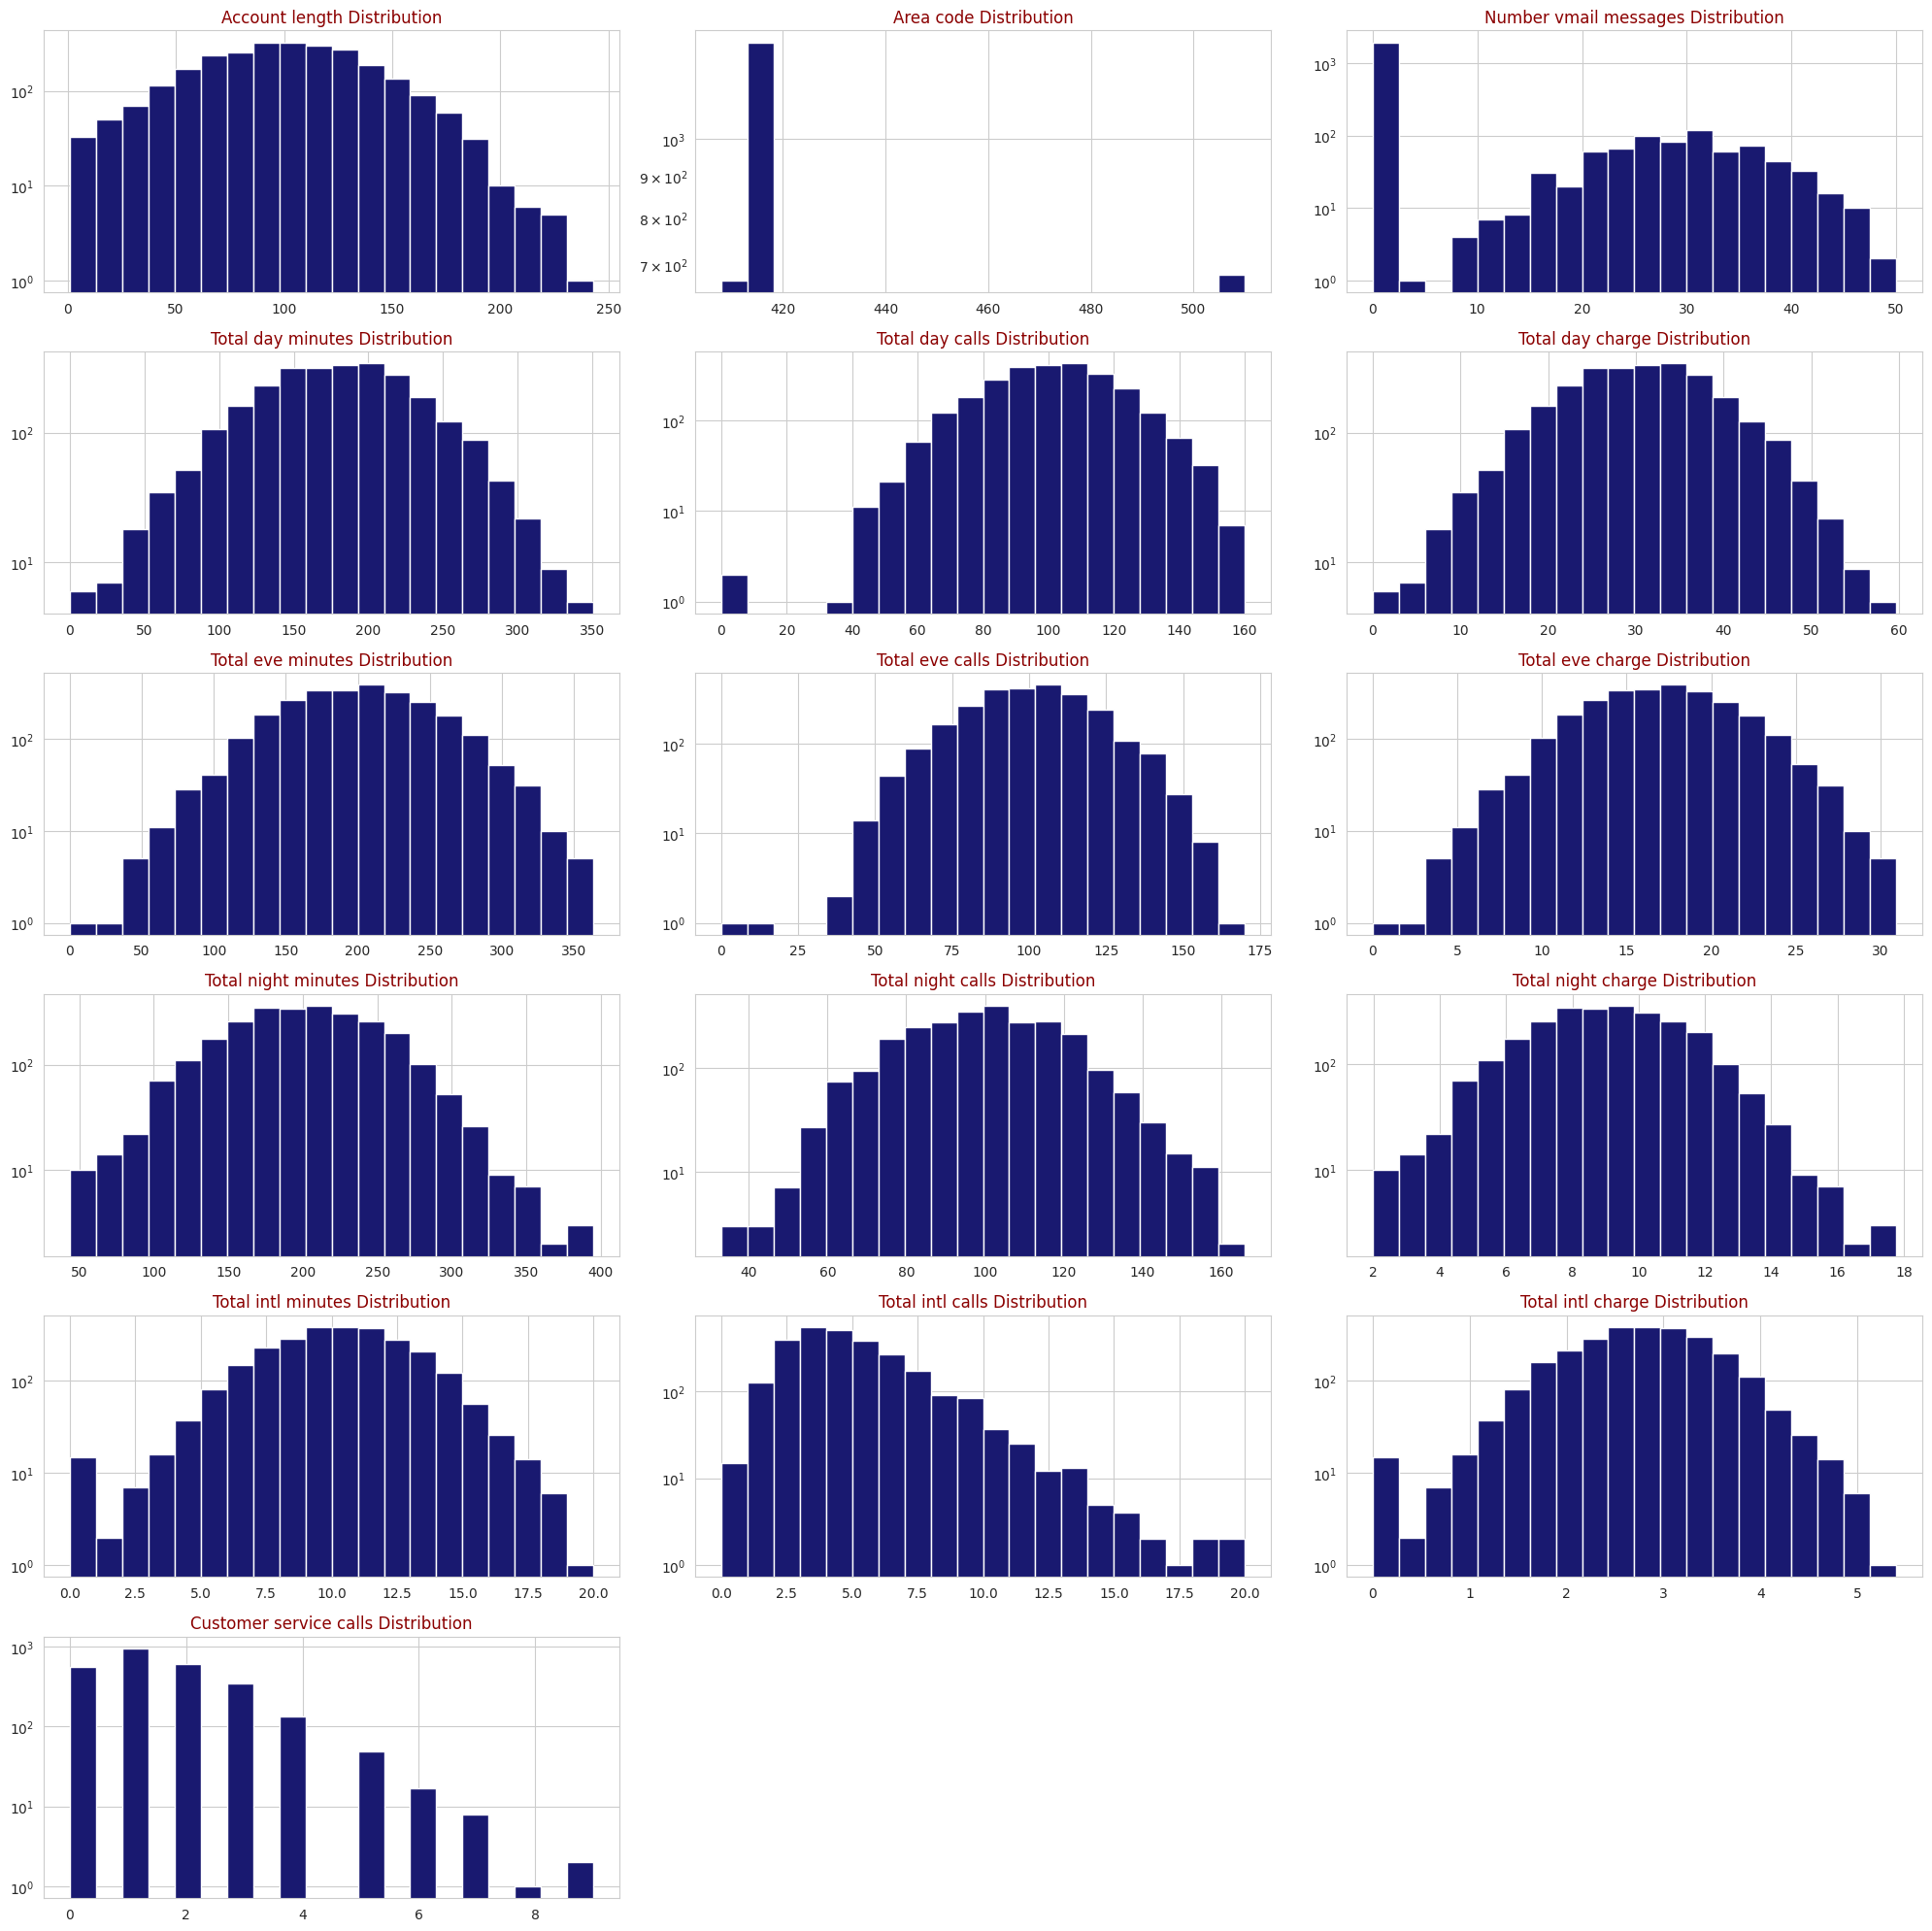

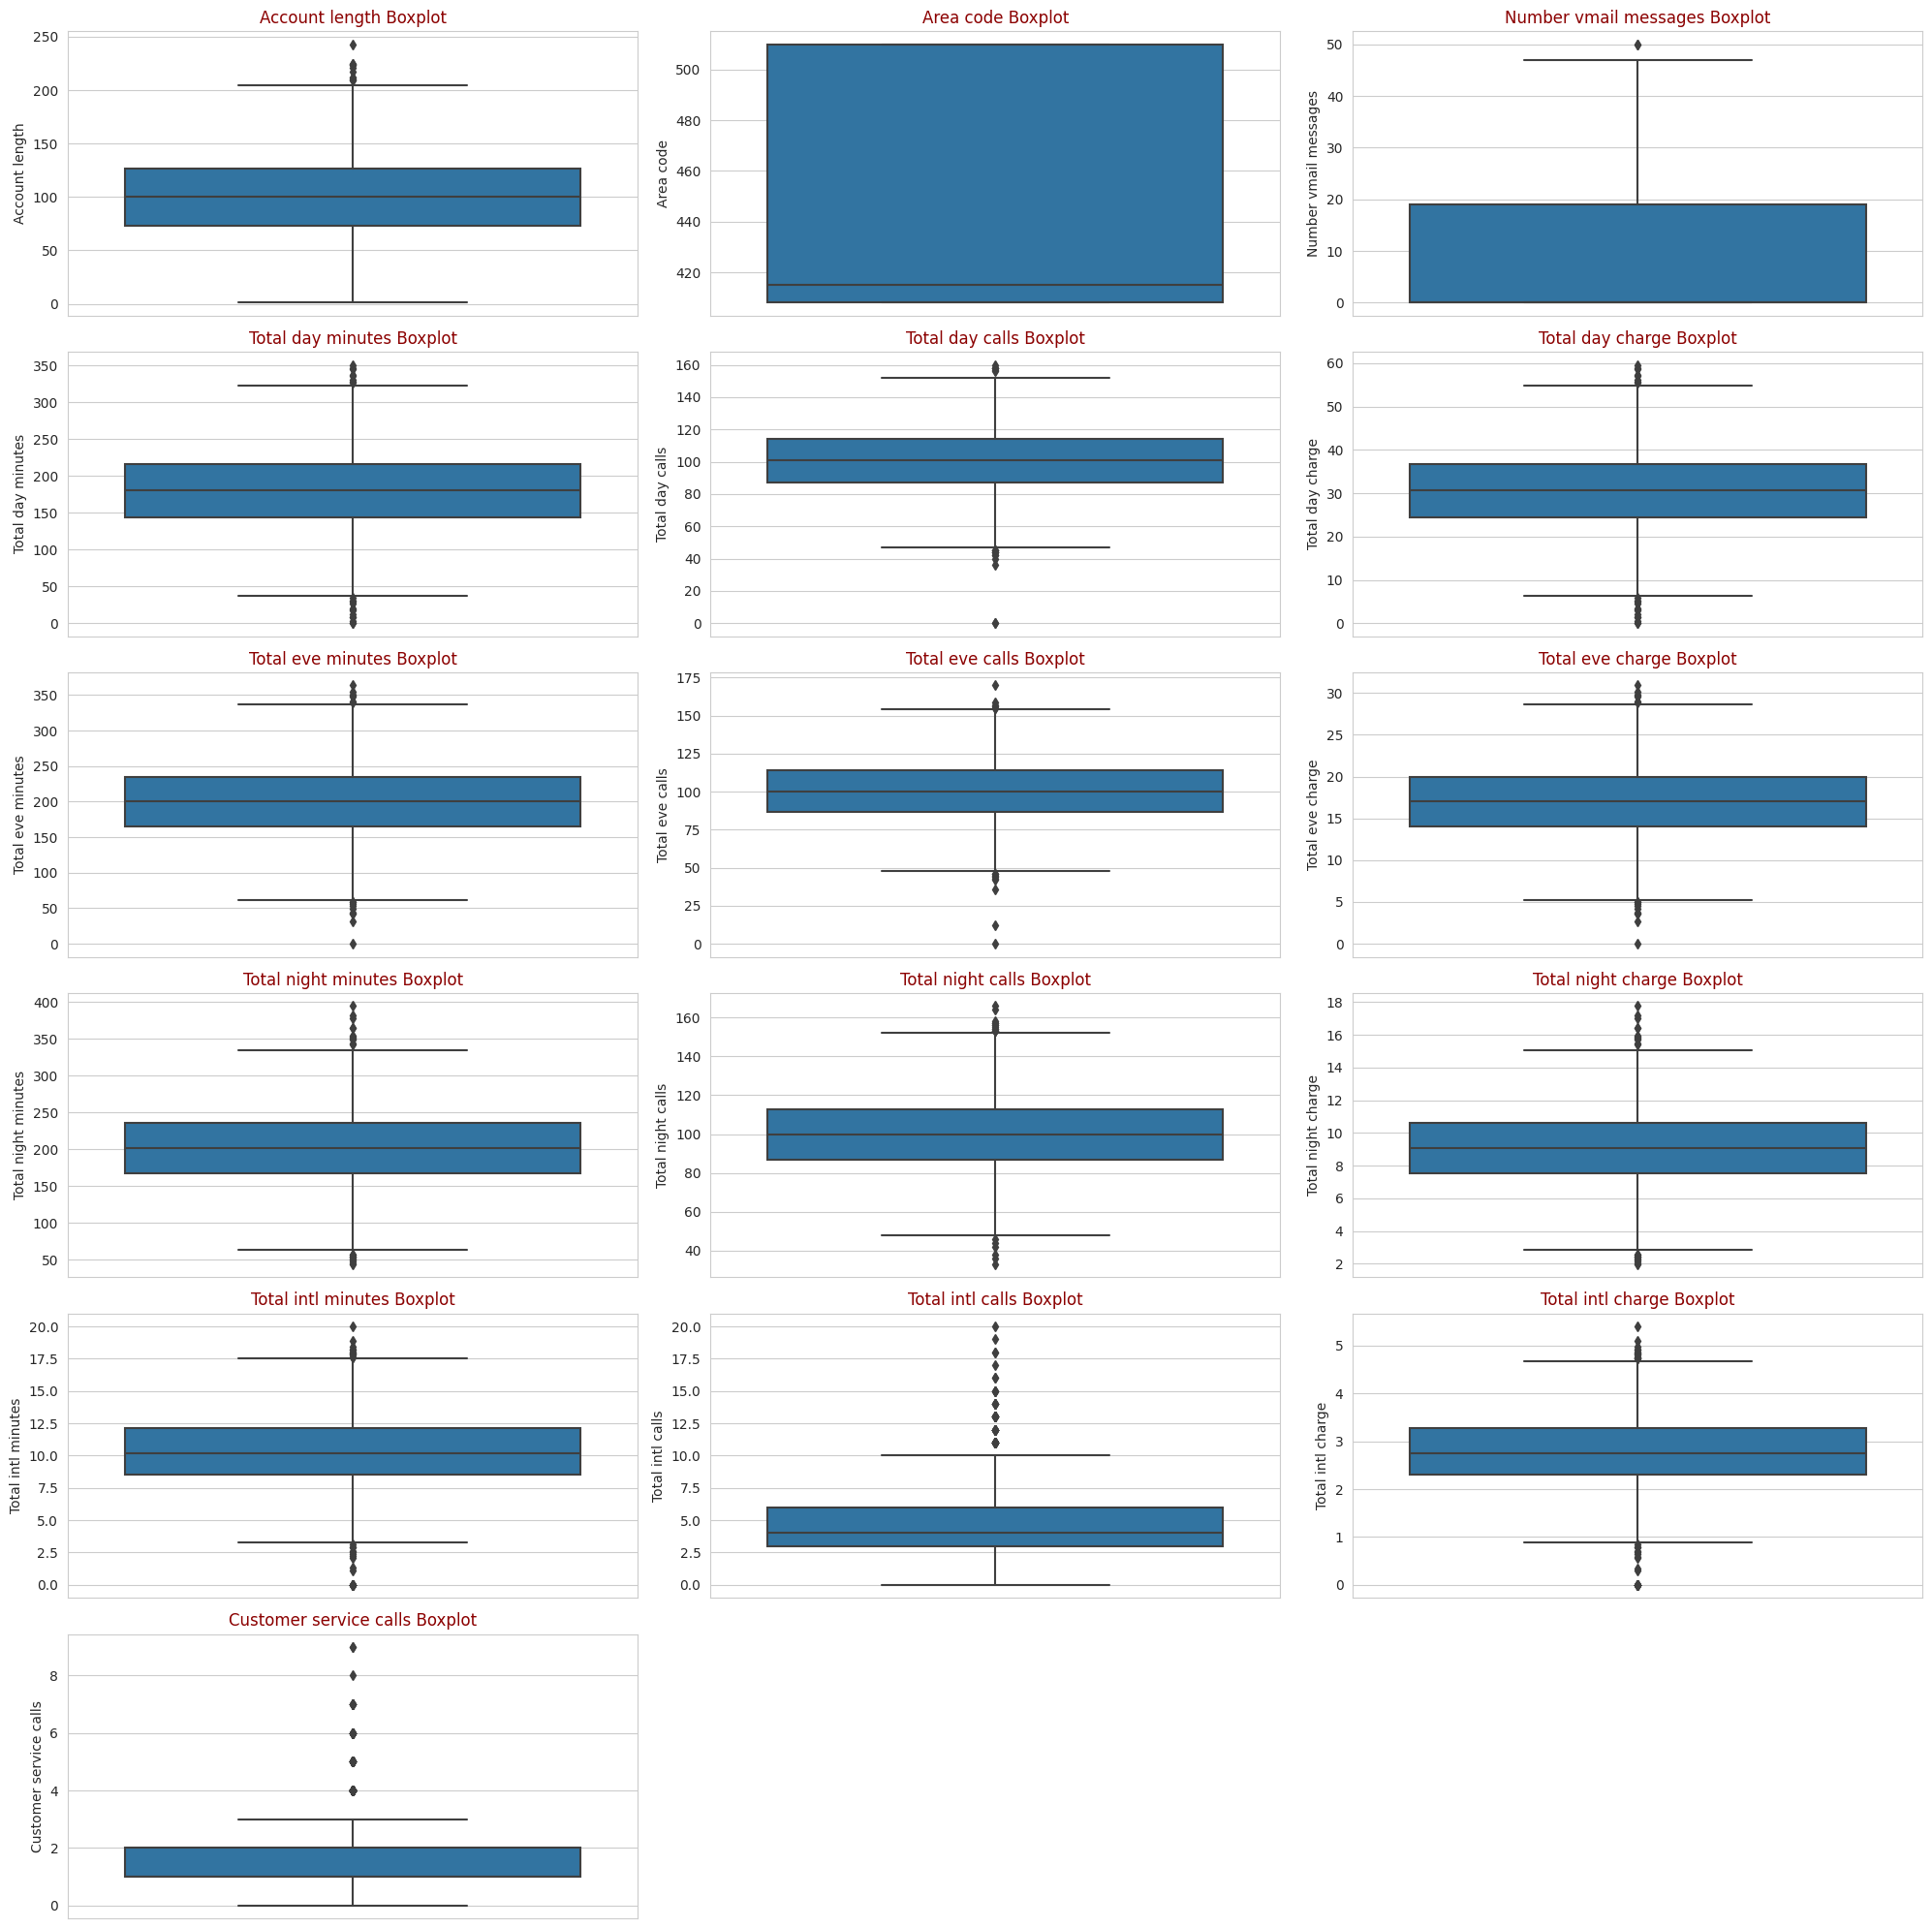

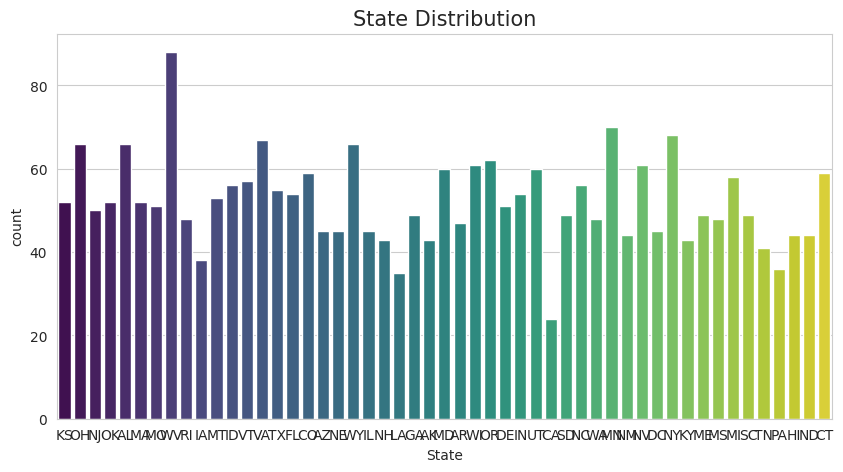

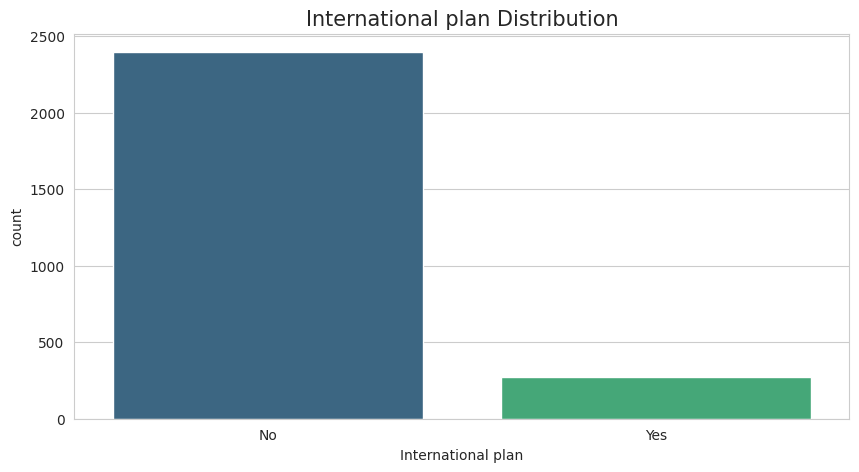

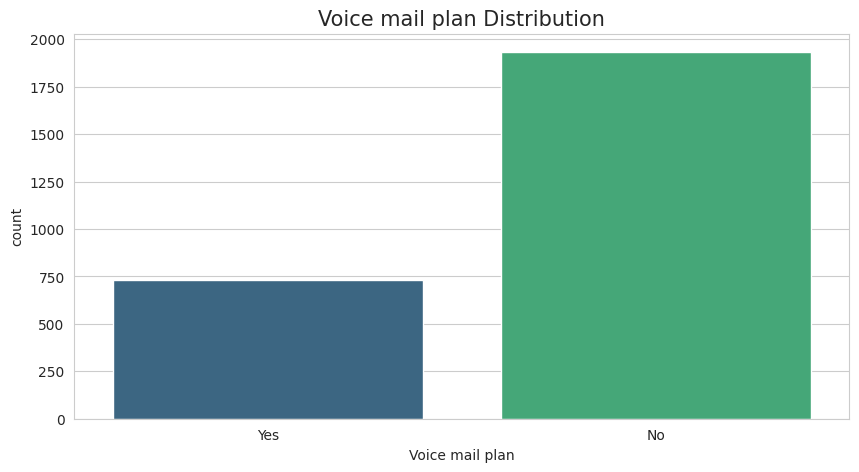

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Creating a function to draw histograms for numerical features
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()

# Creating a function to draw boxplots for numerical features
def draw_boxplots(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        sns.boxplot(data=dataframe, y=feature, ax=ax)
        ax.set_title(feature+" Boxplot",color='DarkRed')
    fig.tight_layout()
    plt.show()

# Creating a function to draw bar plots for categorical features
def draw_barplots(dataframe, features):
    for feature in features:
        plt.figure(figsize=(10,5))
        sns.countplot(x=feature, data=dataframe, palette='viridis')
        plt.title(f"{feature} Distribution", fontsize=15)
        plt.show()

# Selecting the numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Drawing histograms for numerical features
draw_histograms(data, numerical_features, 6, 3)

# Drawing boxplots for numerical features
draw_boxplots(data, numerical_features, 6, 3)

# Drawing bar plots for categorical features
draw_barplots(data, categorical_columns)


<ipython-input-6-1f7d4617ad17>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


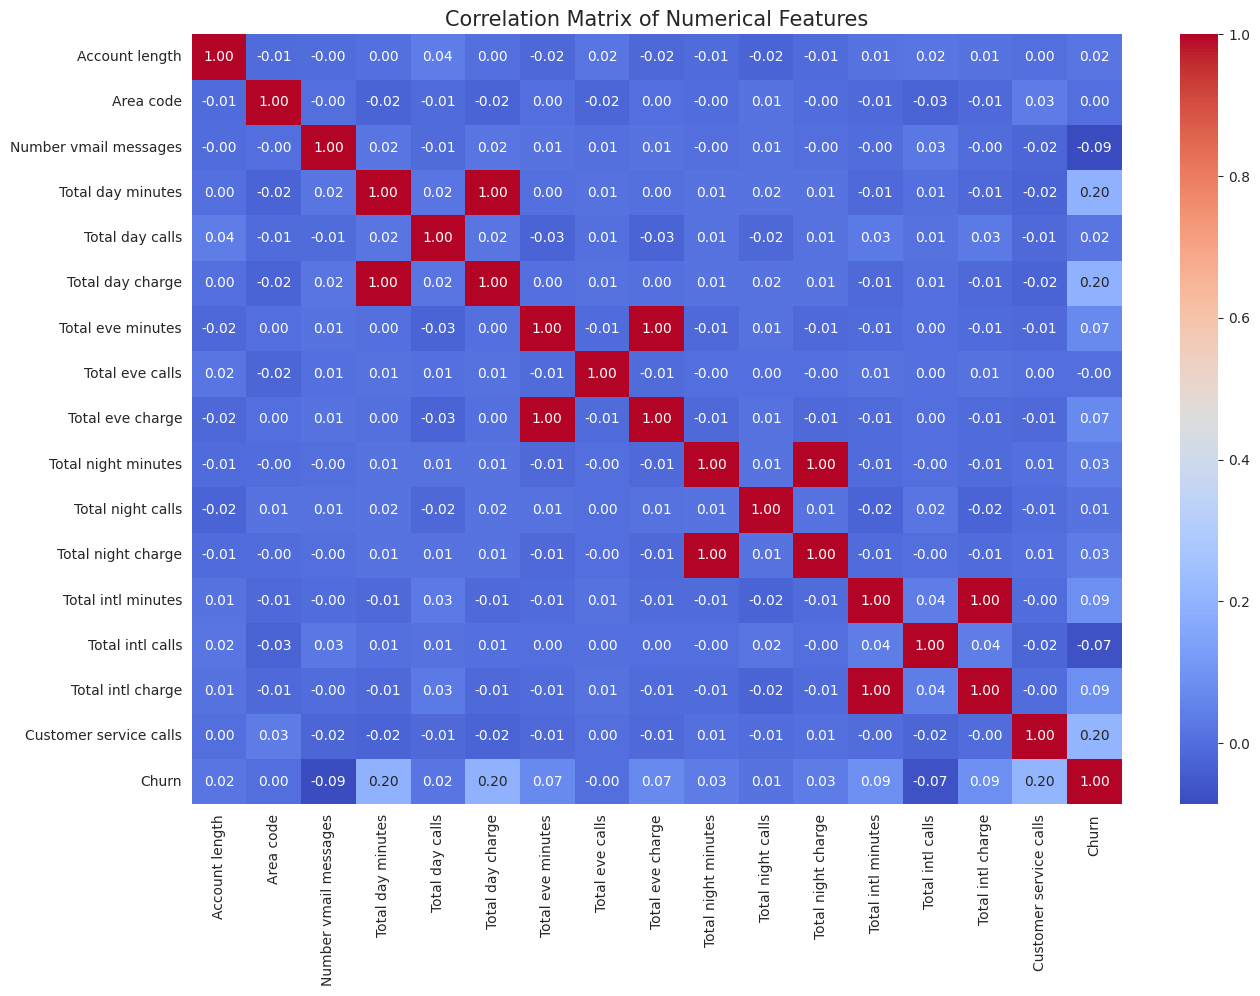

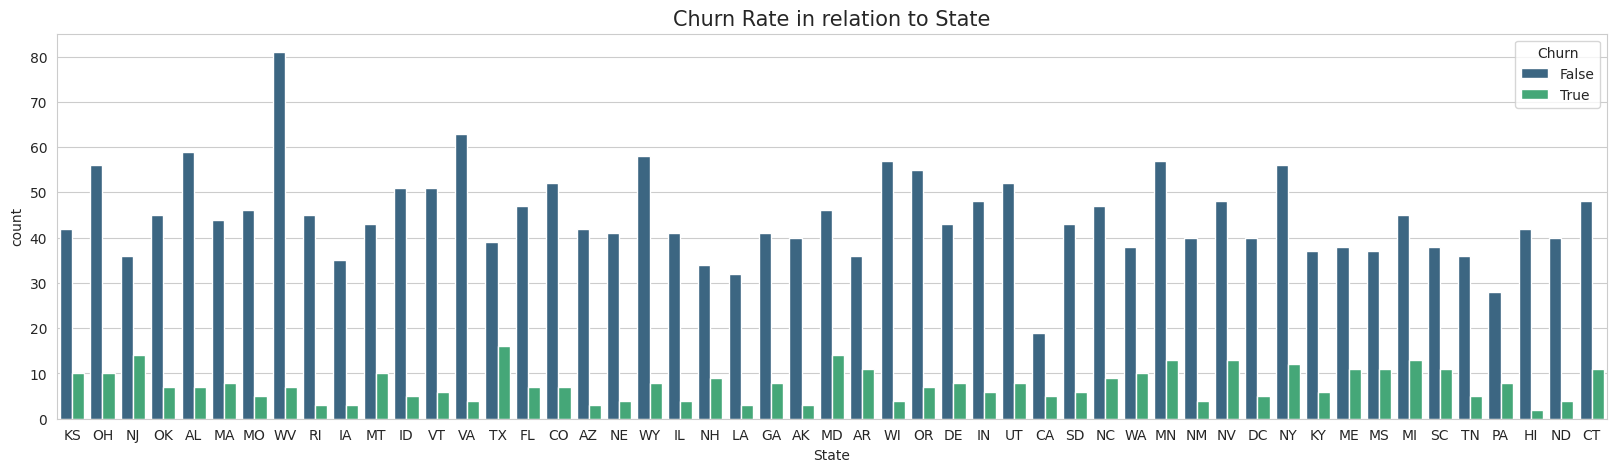

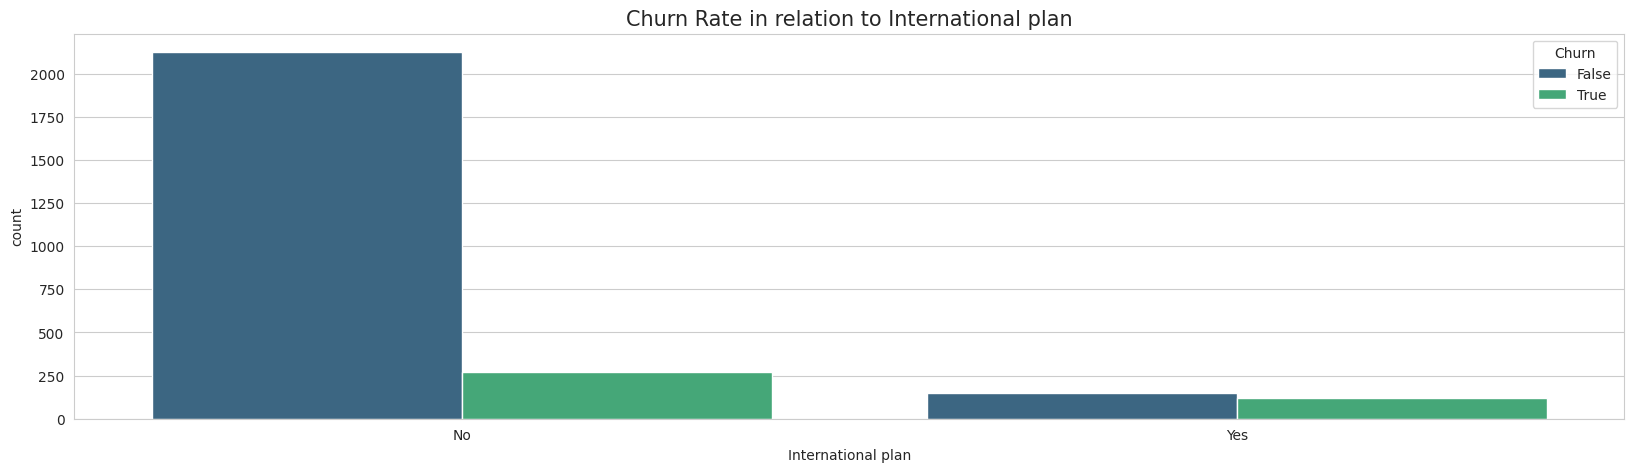

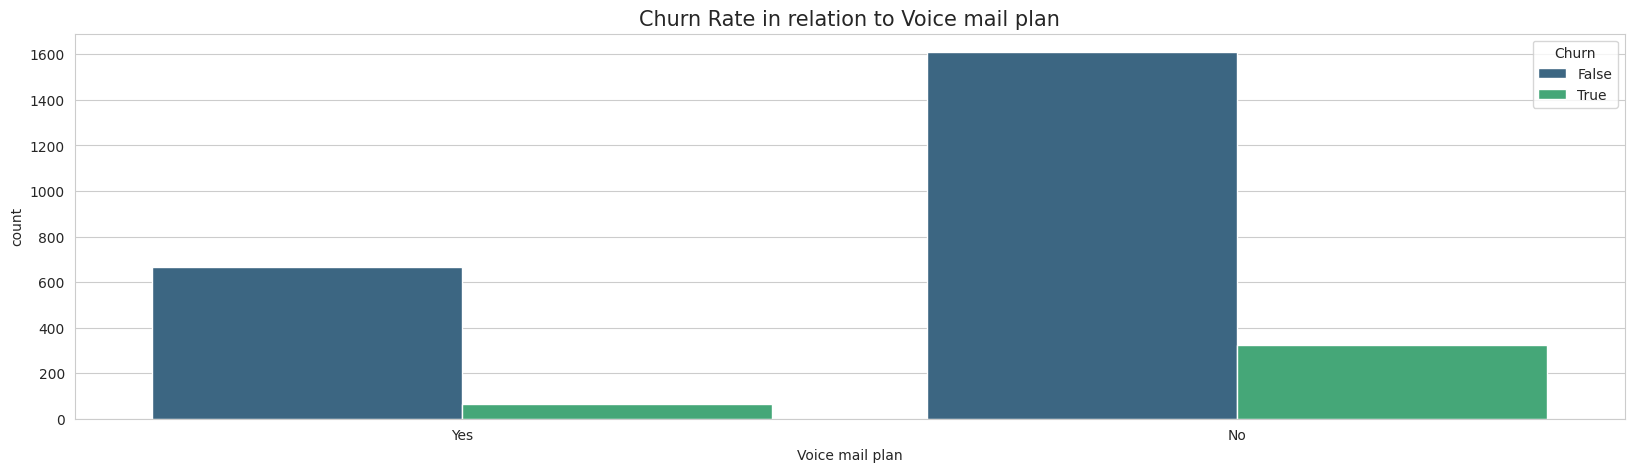

In [ ]:
# Correlation matrix of numerical features
corr_matrix = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=15)
plt.show()

# Churn rate in relation to categorical features
for feature in categorical_columns:
    plt.figure(figsize=(20,5))
    sns.countplot(data=data, x=feature, hue='Churn', palette='viridis')
    plt.title(f"Churn Rate in relation to {feature}", fontsize=15)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining the steps of the preprocessing pipeline
preprocessing_steps = []

# Removing the charge features
# data = data.drop(columns=['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'])

# Converting binary categorical features to numerical
binary_features = ['International plan', 'Voice mail plan']
data[binary_features] = data[binary_features].replace({'Yes': 1, 'No': 0})

# Normalizing numerical features
numerical_features = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
                      'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls',
                      'Total intl minutes', 'Total intl calls', 'Customer service calls']

preprocessing_steps.append(('standard_scaler', StandardScaler(), numerical_features))

# One-hot encoding 'State'
preprocessing_steps.append(('one_hot_encoder', OneHotEncoder(), ['State']))

# Building the preprocessing pipeline
preprocessor = ColumnTransformer(preprocessing_steps)

# Preprocessing the data
data_preprocessed = preprocessor.fit_transform(data.drop('Churn', axis=1))

# Creating a new dataframe with preprocessed data
columns_preprocessed = numerical_features + list(preprocessor.named_transformers_['one_hot_encoder'].get_feature_names_out(['State']))

data_preprocessed = pd.DataFrame(data_preprocessed.toarray(), columns=columns_preprocessed)

# Adding the target variable back to the preprocessed dataframe
data_preprocessed['Churn'] = data['Churn'].values

# Displaying the preprocessed data
data_preprocessed.head()


,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Churn
0,0.692163,1.247508,1.579670,0.484868,-0.058619,-0.050781,0.857403,-0.469031,-0.085020,-0.597527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.161278,1.320985,-0.329918,1.135375,-0.095916,0.147654,1.048458,0.149054,1.242179,-0.597527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0.919686,-0.589414,1.179302,0.685024,-1.554439,0.494917,-0.759668,0.200561,0.704125,0.216894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,-0.420168,-0.589414,2.212509,-1.466653,-2.718509,-0.596479,-0.084083,-0.572045,-1.304609,1.031314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,-0.647691,-0.589414,-0.235822,0.634985,-1.022461,1.090224,-0.281046,1.076181,-0.049150,-0.597527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [ ]:
# Checking the shape of the preprocessed data
data_preprocessed.shape

(2666, 62)

In [ ]:
# Encoding the target variable
data_preprocessed['Churn'] = data_preprocessed['Churn'].replace({False: 0, True: 1})

# Saving the preprocessed data with encoded target to a CSV file
data_preprocessed.to_csv('churn_preprocessed_encoded_target.csv', index=False)

# Display the first few rows of the dataframe
data_preprocessed.head()


,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Churn
0,0.692163,1.247508,1.579670,0.484868,-0.058619,-0.050781,0.857403,-0.469031,-0.085020,-0.597527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.161278,1.320985,-0.329918,1.135375,-0.095916,0.147654,1.048458,0.149054,1.242179,-0.597527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.919686,-0.589414,1.179302,0.685024,-1.554439,0.494917,-0.759668,0.200561,0.704125,0.216894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.420168,-0.589414,2.212509,-1.466653,-2.718509,-0.596479,-0.084083,-0.572045,-1.304609,1.031314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.647691,-0.589414,-0.235822,0.634985,-1.022461,1.090224,-0.281046,1.076181,-0.049150,-0.597527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Load the test set
test_data = pd.read_csv("churn-bigml-20.csv")

# Preprocessing
test_data = test_data.drop(columns=['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'])
test_data[binary_features] = test_data[binary_features].replace({'Yes': 1, 'No': 0})

# Use the preprocessor trained on the training set to transform the test set
test_data_preprocessed = preprocessor.transform(test_data.drop('Churn', axis=1))

# Create a dataframe for the preprocessed test data
test_data_preprocessed = pd.DataFrame(test_data_preprocessed.toarray(), columns=columns_preprocessed)

# Add the target variable
test_data_preprocessed['Churn'] = test_data['Churn']

# Display the preprocessed test data
test_data_preprocessed.head()


,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Churn
0,0.414080,-0.589414,0.092590,-0.165639,2.968355,-0.993351,0.288179,-0.520538,-0.551334,-0.190317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,-0.900493,-0.589414,-0.929547,1.835921,0.551880,-0.844524,0.150304,0.561110,0.883476,0.624104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,1.526412,-0.589414,2.830588,-1.666809,2.304855,-0.149999,-0.799061,1.436730,-1.735052,1.845734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,0.262399,-0.589414,-1.274564,0.134595,-1.238393,0.098046,-0.227866,0.252068,-0.910036,0.624104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,-1.304977,-0.589414,-1.110358,0.835141,0.288835,0.445308,-0.442556,-0.520538,0.309552,-1.411947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [ ]:
# Encoding the target variable
test_data_preprocessed['Churn'] = test_data_preprocessed['Churn'].replace({False: 0, True: 1})

# Saving the preprocessed data with encoded target to a CSV file
test_data_preprocessed.to_csv('churn_preprocessed_encoded_target_test.csv', index=False)

# Display the first few rows of the dataframe
test_data_preprocessed.head()


,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Churn
0,0.414080,-0.589414,0.092590,-0.165639,2.968355,-0.993351,0.288179,-0.520538,-0.551334,-0.190317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.900493,-0.589414,-0.929547,1.835921,0.551880,-0.844524,0.150304,0.561110,0.883476,0.624104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.526412,-0.589414,2.830588,-1.666809,2.304855,-0.149999,-0.799061,1.436730,-1.735052,1.845734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.262399,-0.589414,-1.274564,0.134595,-1.238393,0.098046,-0.227866,0.252068,-0.910036,0.624104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.304977,-0.589414,-1.110358,0.835141,0.288835,0.445308,-0.442556,-0.520538,0.309552,-1.411947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from tqdm import tqdm

# Load the preprocessed data
data = pd.read_csv('churn_preprocessed_encoded_target.csv')

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Define the random state
random_state = 42

# Define the cross-validation procedure with random state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Define the models with random state where applicable
models = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state),
    'LightGBM': LGBMClassifier(random_state=random_state),
    'SVM': svm.SVC(random_state=random_state)
}

# Perform cross-validation
for name, model in tqdm(models.items(), desc="Models"):
    precision_list = []
    recall_list = []
    f1_list = []
    accuracy_list = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        # Perform SMOTE
        smote = SMOTE(random_state=random_state)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Train the model
        model.fit(X_train_smote, y_train_smote)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        accuracy_list.append(accuracy)

    print(f"\nModel: {name}")
    print(f"Precision: {np.mean(precision_list)}")
    print(f"Recall: {np.mean(recall_list)}")
    print(f"F1 Score: {np.mean(f1_list)}")
    print(f"Accuracy: {np.mean(accuracy_list)}")
    print("------------------------")


Models:  20%|██        | 1/5 [00:00<00:02,  1.43it/s]


Model: Logistic Regression
Precision: 0.2771413502169252
Recall: 0.634032634032634
F1 Score: 0.38551444056166506
Accuracy: 0.7066755205149285
------------------------


Models:  40%|████      | 2/5 [00:05<00:08,  2.87s/it]


Model: Random Forest
Precision: 0.7281516639626958
Recall: 0.5182817182817183
F1 Score: 0.604699018448754
Accuracy: 0.9013596981259354
------------------------


Models:  60%|██████    | 3/5 [00:13<00:11,  5.59s/it]


Model: XGBoost
Precision: 0.7684873949579831
Recall: 0.5775890775890776
F1 Score: 0.6583888955533455
Accuracy: 0.9129821306856112
------------------------


Models:  80%|████████  | 4/5 [00:15<00:03,  3.99s/it]


Model: LightGBM
Precision: 0.7529842625856883
Recall: 0.5724608724608725
F1 Score: 0.6490027044651928
Accuracy: 0.9099844706312231
------------------------


Models: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]


Model: SVM
Precision: 0.5178639602449125
Recall: 0.5465867465867466
F1 Score: 0.5305265557641043
Accuracy: 0.8593362424549051
------------------------


Models:  20%|██        | 1/5 [00:00<00:02,  1.95it/s]

Model: Logistic Regression
Precision: 0.2771413502169252
Recall: 0.634032634032634
F1 Score: 0.38551444056166506
Accuracy: 0.7066755205149285
------------------------


Models:  40%|████      | 2/5 [00:04<00:08,  2.83s/it]

Model: Random Forest
Precision: 0.7281516639626958
Recall: 0.5182817182817183
F1 Score: 0.604699018448754
Accuracy: 0.9013596981259354
------------------------


Models:  60%|██████    | 3/5 [00:13<00:11,  5.61s/it]

Model: XGBoost
Precision: 0.7684873949579831
Recall: 0.5775890775890776
F1 Score: 0.6583888955533455
Accuracy: 0.9129821306856112
------------------------


Models:  80%|████████  | 4/5 [00:15<00:04,  4.04s/it]

Model: LightGBM
Precision: 0.7529842625856883
Recall: 0.5724608724608725
F1 Score: 0.6490027044651928
Accuracy: 0.9099844706312231
------------------------


Models: 100%|██████████| 5/5 [00:35<00:00,  7.13s/it]

Model: SVM
Precision: 0.5178639602449125
Recall: 0.5465867465867466
F1 Score: 0.5305265557641043
Accuracy: 0.8593362424549051
------------------------


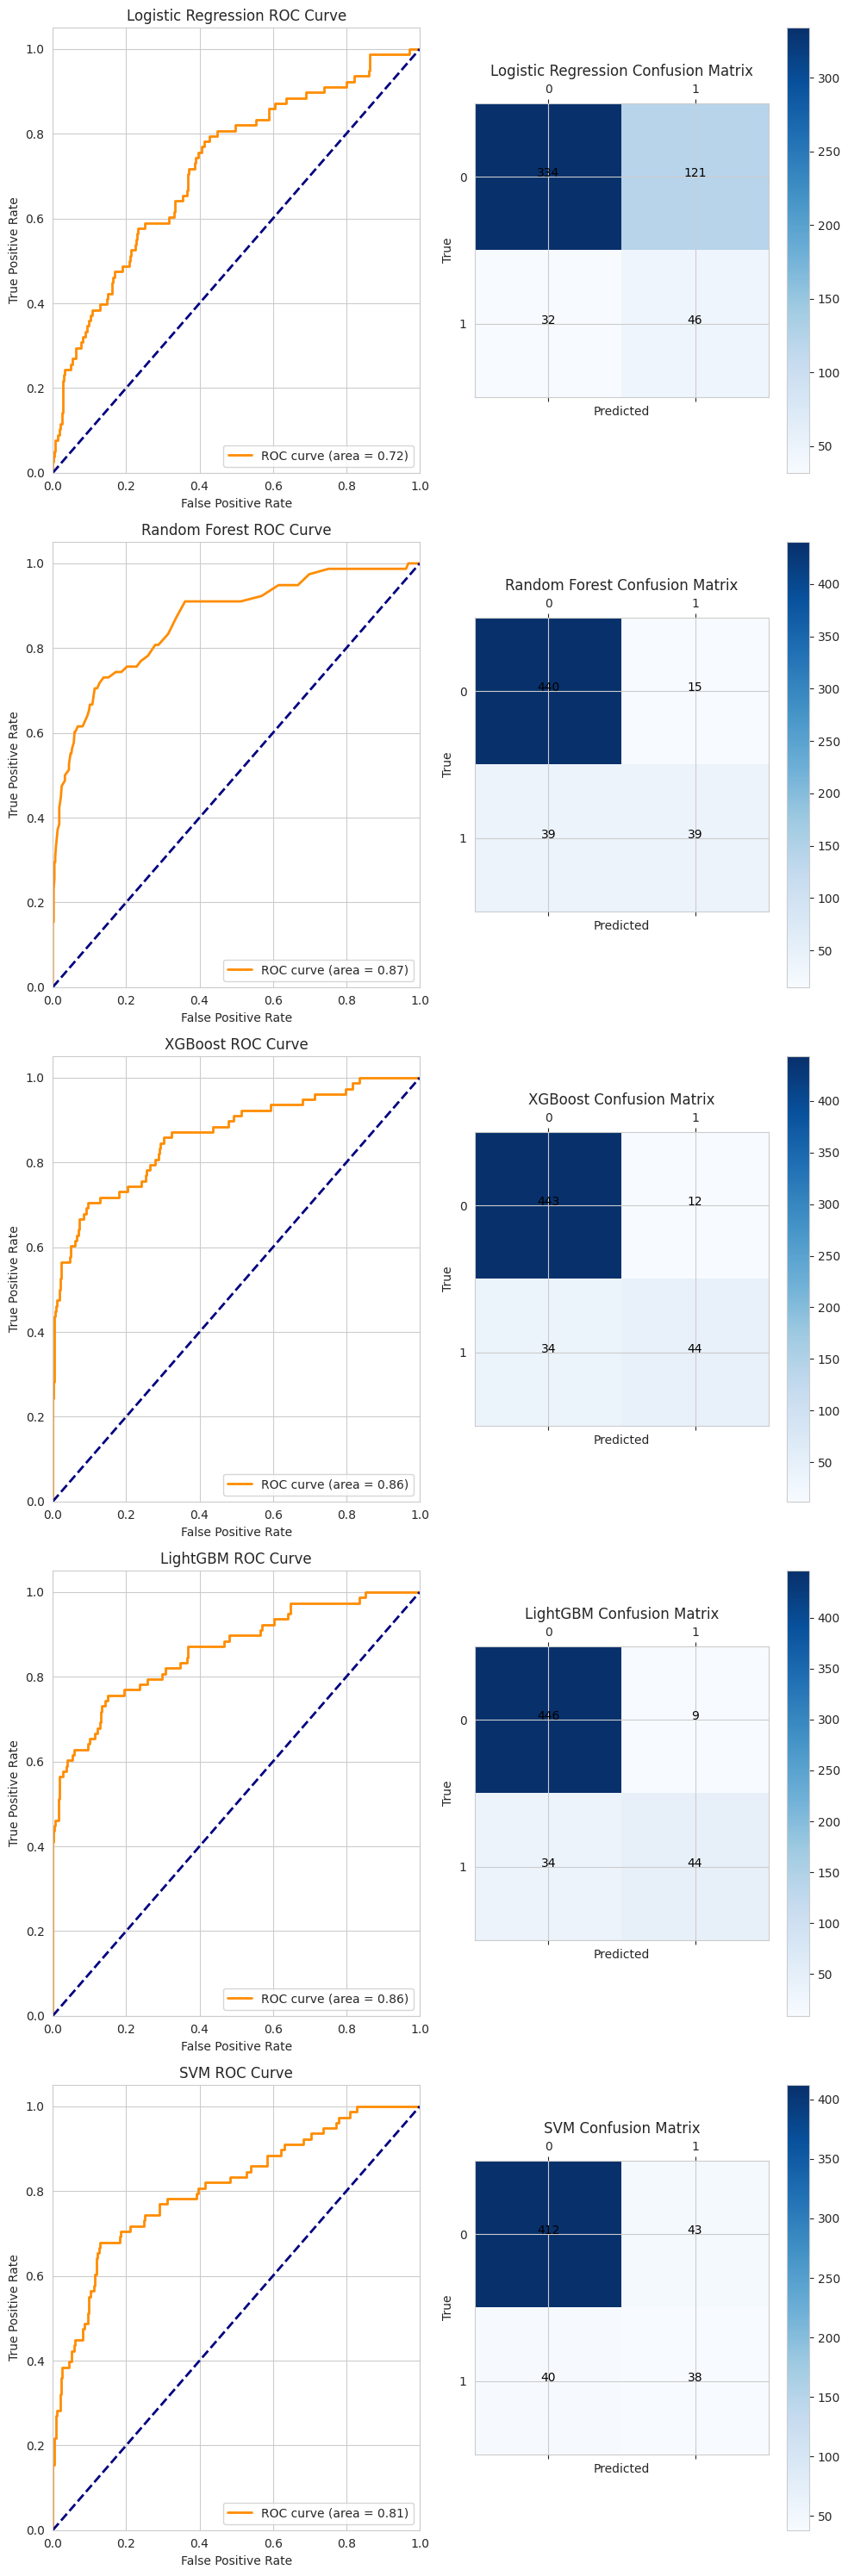

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc, confusion_matrix
from tqdm import tqdm

# Load the preprocessed data
data = pd.read_csv('churn_preprocessed_encoded_target.csv')

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Define the random state
random_state = 42

# Define the cross-validation procedure with random state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Define the models with random state where applicable
models = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state),
    'LightGBM': LGBMClassifier(random_state=random_state),
    'SVM': svm.SVC(random_state=random_state, probability=True)  # Ensure probabilities are calculated
}

# Define the figure for plotting
fig, ax = plt.subplots(nrows=len(models), ncols=2, figsize=(10, 30))

# Perform cross-validation
for i, (name, model) in enumerate(tqdm(models.items(), desc="Models")):
    precision_list = []
    recall_list = []
    f1_list = []
    accuracy_list = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        # Perform SMOTE
        smote = SMOTE(random_state=random_state)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Train the model
        model.fit(X_train_smote, y_train_smote)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        accuracy_list.append(accuracy)

    print(f"Model: {name}")
    print(f"Precision: {np.mean(precision_list)}")
    print(f"Recall: {np.mean(recall_list)}")
    print(f"F1 Score: {np.mean(f1_list)}")
    print(f"Accuracy: {np.mean(accuracy_list)}")
    print("------------------------")

    # Calculate the roc curve
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    ax[i][0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    ax[i][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[i][0].set_xlim([0.0, 1.0])
    ax[i][0].set_ylim([0.0, 1.05])
    ax[i][0].set_xlabel('False Positive Rate')
    ax[i][0].set_ylabel('True Positive Rate')
    ax[i][0].set_title(f'{name} ROC Curve')
    ax[i][0].legend(loc="lower right")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    cax = ax[i][1].matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    for a, b in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax[i][1].text(b, a, str(cm[a, b]), horizontalalignment="center", color="black")
    ax[i][1].set_xlabel('Predicted')
    ax[i][1].set_ylabel('True')
    ax[i][1].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()


In [ ]:
#TODO: deal with imbalancy because its imbalanced and the results are note doing good
#TODO: Add test dataset as well
# Continue to next steps including adding neural networks